In [1]:
from moku.instruments import PIDController
from moku.instruments import Oscilloscope
from numpy import sqrt, pi, array, arange, polyfit

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime

%matplotlib inline

# Stability Measurements

In [2]:
# ----- data ----- #
data = np.flip(np.loadtxt('nakayun2_01_10_2021.csv', delimiter=',', skiprows=1, usecols=[1,2]), axis=0)
time = np.flip(np.loadtxt('nakayun2_01_10_2021.csv', delimiter=',', skiprows=1, usecols=0, dtype='str'))

labels=['trash', 'spec']; col = list(mcolors.TABLEAU_COLORS)

Text(0.5, 1.0, '01-03/10/2021 - Stability test (trash, spectroscopy)')

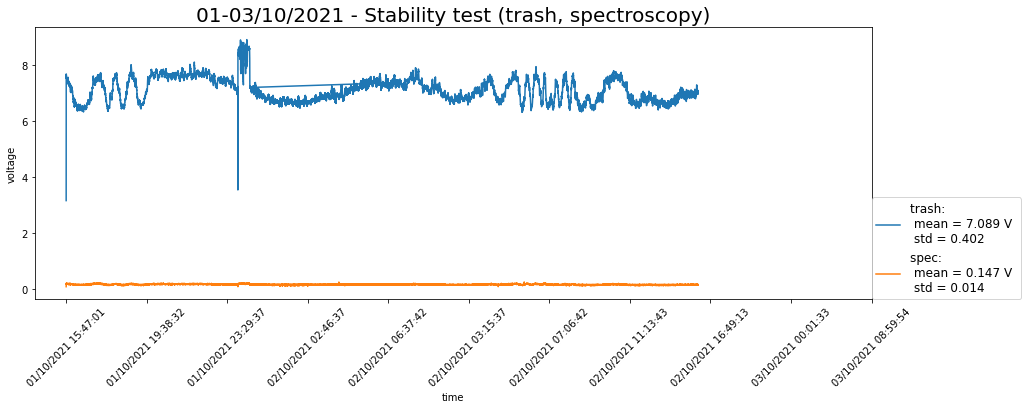

In [3]:
means = []; stds = []
fig, ax = plt.subplots(figsize=(15,5))

# ----- calculate ----- #
for i in range(len(data[0,:])):
    mean = np.round(np.mean(data[:,i]),3); std = np.round(np.std(data[:,i]),3);means.append(mean); stds.append(std)
    
    # ax.text(1,0.8-i*0.3, labels[i] +': \n mean = ' + str(mean) + ' V \n std = ' + str(std), fontsize=14, transform=ax.transAxes, bbox=props)
    ax.plot(time, data[:,i], label=labels[i]+': \n mean = ' + str(mean) + ' V \n std = ' + str(std), c=col[i])

# ----- plot ----- #
ax.legend(loc=(1,0), fontsize=12); ax.set_xlabel('time'); ax.set_ylabel('voltage')
ax.set_xticks(np.arange(0, len(time), int(len(time)/10)))
ax.set_xticklabels(time[np.arange(0, len(data), int(len(data)/10))], rotation=45)
ax.set_title('01-03/10/2021 - Stability test (trash, spectroscopy)', fontsize=20)

# MOKU:GO

In [ ]:
# This example demonstrates how you can configure the Oscilloscope instrument,
# and view triggered time-voltage data frames in real-time.
#
# (c) 2021 Liquid Instruments Pty. Ltd.

print('START : ' + datetime.datetime.now().strftime("%d/%m/%Y, %H:%M:%S"))
def on_close(event):
    print('Closed Figure!')
    i.relinquish_ownership()
    
# Connect to your Moku by its ip address using Oscilloscope('192.168.###.###')
# or by its serial number using Oscilloscope(serial=123)
i = Oscilloscope('129.206.180.142', force_connect=True)

try:
    # Trigger on input Channel 1, rising edge, 0V 
    i.set_trigger(type='Edge', source='Input1', level=0)

    # View +-5usec, i.e. trigger in the centre
    i.set_timebase(-5e-6, 5e-6)

    # Generate an output sine wave on Channel 1, 1Vpp, 1MHz, 0V offset
    i.generate_waveform(1, 'DC', amplitude=1)
    i.generate_waveform(2, 'Sine', amplitude=1, frequency=1e6)

    # Set the data source of Channel 1 to be Input 1
    i.set_source(1, 'Input1')

    # Set the data source of Channel 2 to the generated output sinewave
    i.set_source(2, 'Input2')


    # Get initial data frame to set up plotting parameters. This can be done
    # once if we know that the axes aren't going to change (otherwise we'd do
    # this in the loop)
    data = i.get_data()
    print(data.keys())

    # Set up the plotting parameters
    plt.ion()
    plt.show()
    plt.grid(b=True)
    plt.ylim([-1, 1])
    plt.xlim([data['time'][0], data['time'][-1]])

    line1, = plt.plot([], label='channel 1')
    line2, = plt.plot([], label='channel 2')

    # Configure labels for axes
    ax = plt.gca()
    
    # This loops continuously updates the plot with new data
    while True:
        # Get new data
        data = i.get_data()

        # Update the plot
        line1.set_ydata(data['ch1'])
        line2.set_ydata(data['ch2'])
        line1.set_xdata(data['time'])
        line2.set_xdata(data['time'])
        
        ax.set_title(datetime.datetime.now().strftime("%d/%m/%Y, %H:%M:%S"))
        ax.legend()

        plt.pause(0.001)
        
        fig = plt.gcf()  # get current figure
        fig.canvas.mpl_connect('close_event', on_close)
        
except Exception as e:
    print(f'Exception occurred: {e}')
except KeyboardInterrupt:
    print('Interrupt!')
finally:
    # Close the connection to the Moku device
    # This ensures network resources and released correctly
    i.relinquish_ownership()
    print('Ownership relinquished!')

In [ ]:
i.relinquish_ownership()